<a href="https://colab.research.google.com/github/rochinha23/Curso-Data-Science-e-Machine-Learning-com-Estatistica-e-Python/blob/main/Regressao_Linear_Predicao_da_Idade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regressão Linear - Predição da Idade que estão faltando do Titanic**

**importando bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

**ler train.csv e test.csv**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [4]:
from google.colab import files
uploaded2 = files.upload()

Saving test.csv to test.csv


In [6]:
import io
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test = pd.read_csv(io.BytesIO(uploaded2['test.csv']))

**transformar definir o id do Passageiro como index**

In [9]:
train.set_index('PassengerId', inplace=True)

In [10]:
test.set_index('PassengerId', inplace=True)

**verificar shape dos dois**

In [11]:
train.shape, test.shape

((891, 11), (418, 10))

**criar coluna "Survived" no test set**

In [12]:
test['Survived'] = np.nan

**Conferir shape novamente**

In [13]:
train.shape, test.shape

((891, 11), (418, 11))

**Concatenar train e test set**

In [17]:
data = pd.concat([train, test], sort=False)

In [18]:
data.shape

(1309, 11)

**Traduzir colunas**

In [19]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
data.columns = ['Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 
                'IrmaosConjuge', 'PaisFilhos', 'Bilhete', 'Tarifa', 
                'Cabine', 'Embarque']

**Traduzir coluna Sexo**

In [25]:
data['Sexo'] = data['Sexo'].map({'male':'homem','female':'mulher'})

In [26]:
data['Sexo']

PassengerId
1        homem
2       mulher
3       mulher
4       mulher
5        homem
         ...  
1305     homem
1306    mulher
1307     homem
1308     homem
1309     homem
Name: Sexo, Length: 1309, dtype: object

**Averiguar dados nulos**

In [28]:
data.isnull().sum()

Sobreviveu        418
Classe              0
Nome                0
Sexo                0
Idade             263
IrmaosConjuge       0
PaisFilhos          0
Bilhete             0
Tarifa              1
Cabine           1014
Embarque            2
dtype: int64

**Remover Cabine**

In [29]:
data.drop('Cabine', axis=1,inplace=True)

**Checar dados nulos novamente**

In [30]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             1
Embarque           2
dtype: int64

**Preencher dados nulos de "Embarque" com a moda**

In [31]:
data['Embarque'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [35]:
moda = data['Embarque'].mode()[0]
moda

'S'

In [37]:
data['Embarque'].fillna(moda, inplace=True)

**Checar dados nulos novamente**

In [38]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             1
Embarque           0
dtype: int64

**Preencher "Tarifa" faltando com a média**

In [42]:
media = data['Tarifa'].mean()

In [43]:
data['Tarifa'].fillna(media, inplace=True)

**Checar dados nulos**

In [44]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Embarque           0
dtype: int64

**Verificar correlações**

In [45]:
data.corr()

,Sobreviveu,Classe,Idade,IrmaosConjuge,PaisFilhos,Tarifa
Sobreviveu,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Classe,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558477
Idade,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178229
IrmaosConjuge,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160224
PaisFilhos,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221522
Tarifa,0.257307,-0.558477,0.178229,0.160224,0.221522,1.000000


**Visualizar correlações com "heatmap"**

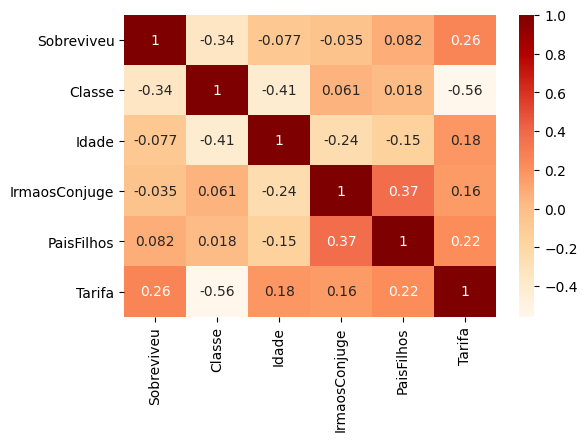

In [50]:
f, ax = plt.subplots(dpi=100)
sns.heatmap(data.corr(), annot=True, cmap='OrRd')

**Remover coluna "Sobreviveu"**

aparentemente não tem muita correlação com idade, e está faltando bastante dados

In [52]:
data.drop('Sobreviveu', axis=1,inplace=True)

**Checar dados nulos**

In [53]:
data.isnull().sum()

Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Embarque           0
dtype: int64

**Engenharia de Recursos I**

**Criar coluna "Titulo" baseando-se na coluna "Nome"**